In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Data1\\Data1\\section 5\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
#fir model
#order p,d,q

model = ARIMA(data, order=(5,1,0))
#set the lag value to 5 for autoregression
#uses different order of 1 to make the time series stationary
#and uses moving average model of 0
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\bagwe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\bagwe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Mon, 17 Feb 2020   AIC                           1390.495
Time:                        18:58:41   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.193      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

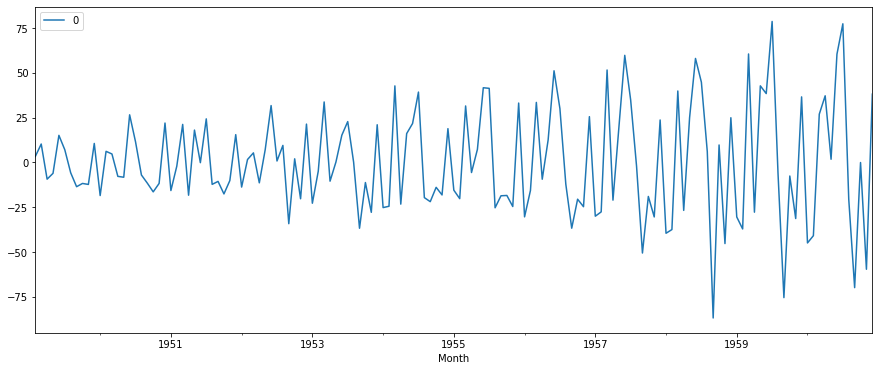

In [5]:
#plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
#here may still trend information not captured by the model

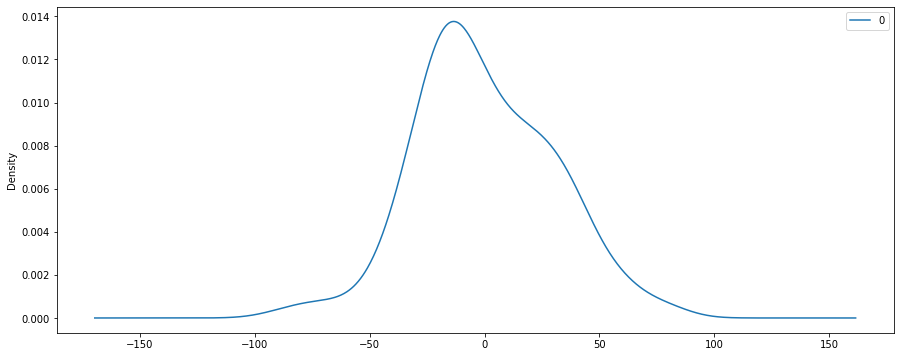

                0
count  143.000000
mean     0.010304
std     29.828333
min    -86.805553
25%    -19.916138
50%     -5.624231
75%     21.573899
max     78.697584


In [6]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [7]:
## a non-zero mean in the residual --> results shows that there is a bias in the prediction
## as it is very small we can ignore it

## how good is the model

In [8]:
X = data.values

In [9]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=383.349047, expected=340.000000
predicted=351.781286, expected=318.000000
predicted=322.739343, expected=362.000000
predicted=372.884414, expected=348.000000
predicted=333.332460, expected=363.000000
predicted=382.493443, expected=435.000000
predicted=435.787786, expected=491.000000
predicted=502.006273, expected=505.000000
predicted=497.701957, expected=404.000000
predicted=347.130149, expected=359.000000
predicted=364.777334, expected=310.000000
predicted=307.297444, expected=337.000000
predicted=394.595001, expected=360.000000
predicted=377.731210, expected=342.000000
predicted=343.945946, expected=406.000000
predicted=419.248029, expected=396.000000
predicted=377.269069, expected=420.000000
predicted=433.784165, expected=472.000000
predicted=462.008914, expected=548.000000
predicted=569.727766, expected=559.000000
predicted=544.074847, expected=463.000000
predicted=418.350448, expected=407.000000
predicted=395.543461, expected=362.000000
predicted=369.154127, expected=405

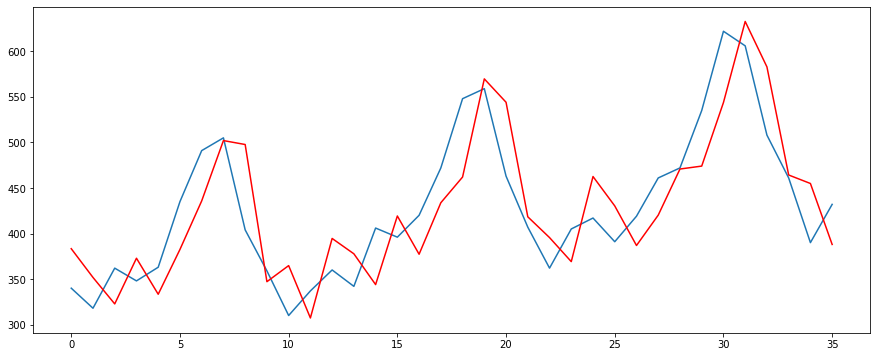

In [10]:
#compare the 25% tested values with the predicted values
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()